In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
df_1 = pd.read_csv('data_v3.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
df_1

,Price
Date,
2002-01-03,3835.0
2002-01-04,3835.0
2002-01-05,0.0
2002-01-06,0.0
2002-01-07,3835.0
...,...
2022-06-02,4051.0
2022-06-03,4050.0
2022-06-04,0.0


In [45]:
# Replace 0 with NaN
df_1.replace(0, np.nan, inplace=True)

In [46]:
df_1

,Price
Date,
2002-01-03,3835.0
2002-01-04,3835.0
2002-01-05,NaN
2002-01-06,NaN
2002-01-07,3835.0
...,...
2022-06-02,4051.0
2022-06-03,4050.0
2022-06-04,NaN


In [47]:
# creating series True or False for NaN data and present data respectively. 
nul_data = pd.isnull(df_1['Price']) 
    
# print only the data, Customers = NaN 
df_1[nul_data]

,Price
Date,
2002-01-05,NaN
2002-01-06,NaN
2002-01-12,NaN
2002-01-13,NaN
2002-01-19,NaN
...,...
2022-05-22,NaN
2022-05-28,NaN
2022-05-29,NaN


In [48]:
df_1

,Price
Date,
2002-01-03,3835.0
2002-01-04,3835.0
2002-01-05,NaN
2002-01-06,NaN
2002-01-07,3835.0
...,...
2022-06-02,4051.0
2022-06-03,4050.0
2022-06-04,NaN


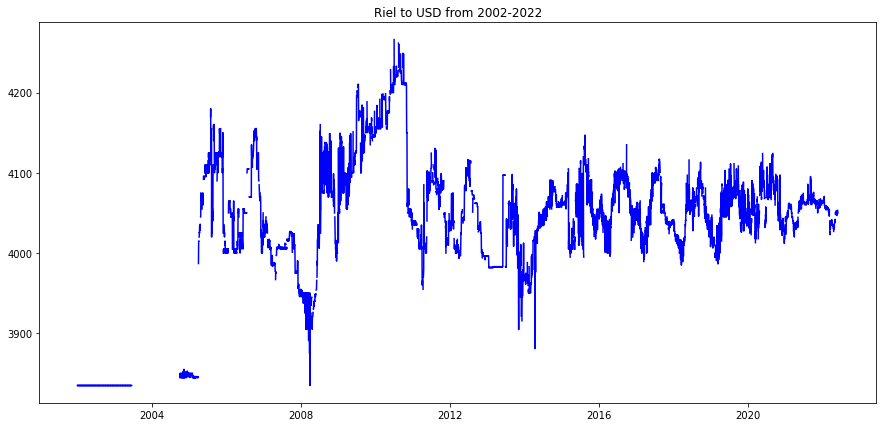

In [49]:
 # set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(df_1['Price'], color='blue')
# adds title to our time series plot
plt.title('Riel to USD from 2002-2022') 
# print the plot
plt.show()

## Replacing missing value by fill them with mean

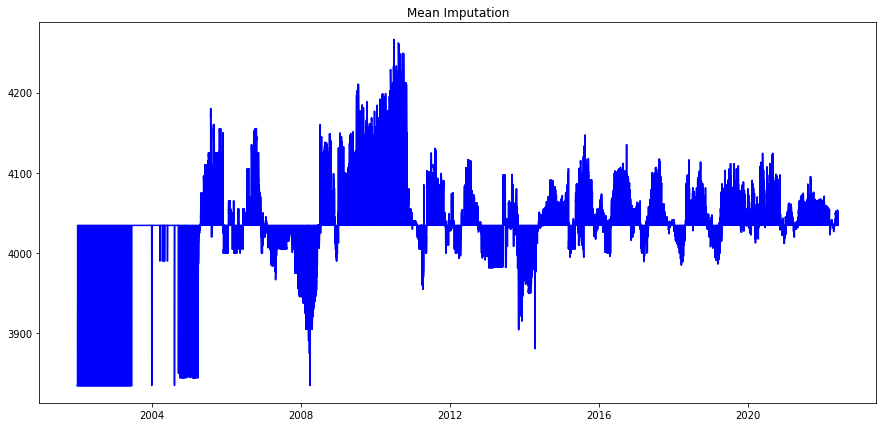

In [53]:
# declare the size of the  plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
df_1 = df_1.assign(FillMean=df_1.Price.fillna(df_1.Price.mean()))
# pass the data and declared the colour of your curve, i.e., blue
plt.plot(df_1, color='blue')
# add tittle to the plot
plt.title('Mean Imputation')
 # print the plot
plt.show()
df_1.to_csv('data_v4_cleaned.csv', index=True)

## Median imputation

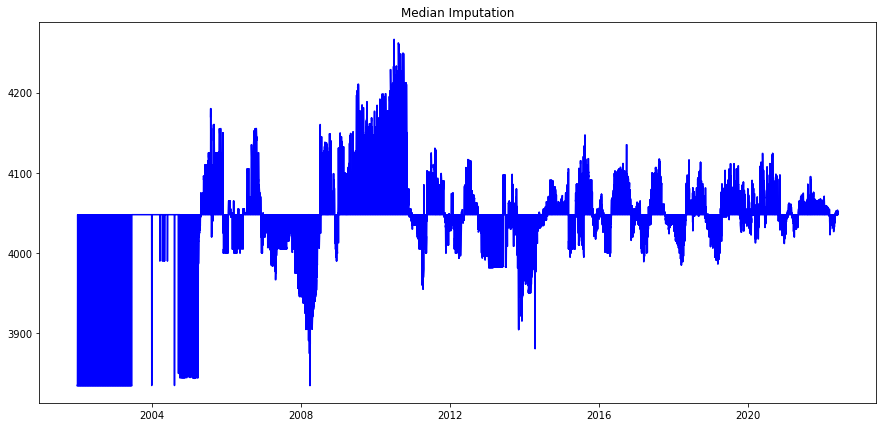

In [52]:
# declare the size of the  plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the of the present observations
df_1 = df_1.assign(FillMean=df_1.Price.fillna(df_1.Price.median()))
# pass the data and declared the colouyr opf our curve as blue
plt.plot(df_1, color='blue')
# add tittle to the plot
plt.title('Median Imputation')
 # print the plot
plt.show()

## Last Observation Carried Forward (LOCF)

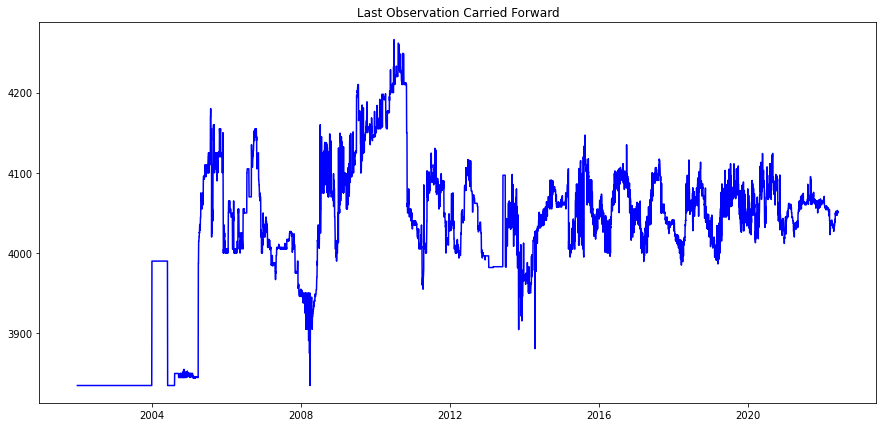

In [54]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
df_1['Price_locf']= df_1['Price'].fillna(method ='bfill')
# plot our time series with imputed values
plt.plot(df_1['Price_locf'], color='blue')
#Plot tittle
plt.title('Last Observation Carried Forward')
# show the plot
plt.show()
#save file
df_1.to_csv('data_v5_cleaned.csv', index=True)

## Linear interpolation

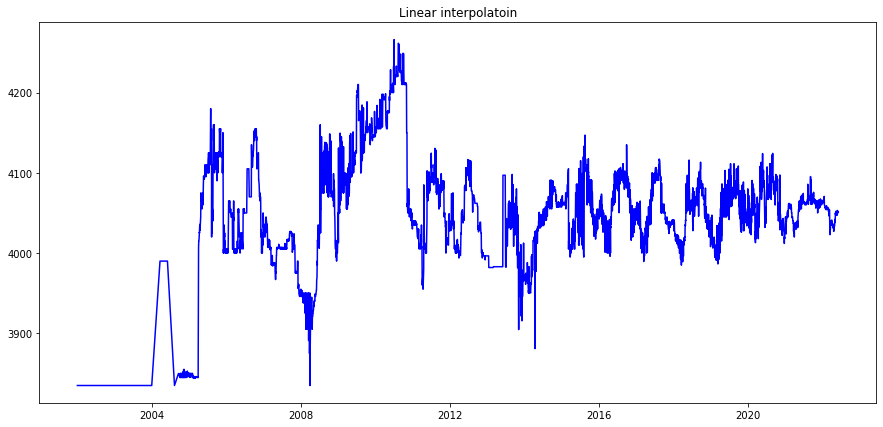

In [55]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using rolling window method
df_1['Price_L']= df_1['Price'].interpolate(method='linear')
# plot the complete dataset
plt.plot(df_1['Price_L'], color='blue')
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.show()
#save file
df_1.to_csv('data_v6_cleaned.csv', index=True)

## Spline interpolation

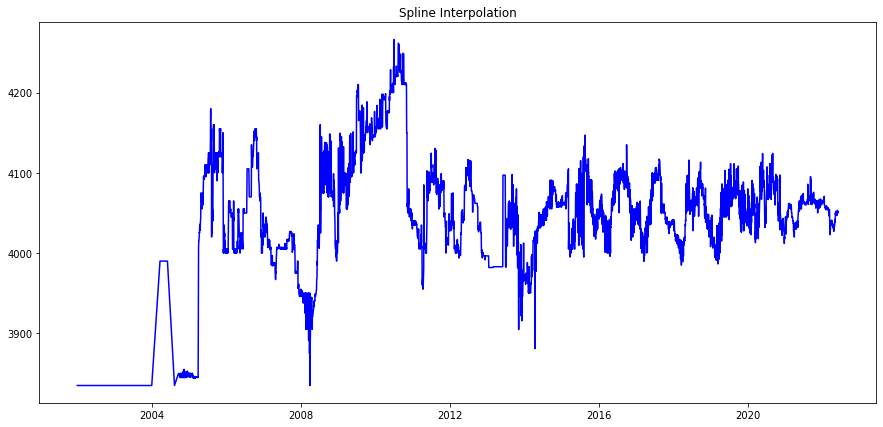

In [56]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
df_1['Price_Spline']= df_1['Price'].interpolate(option='spline')
# plot the complete dataset
plt.plot(df_1['Price_Spline'], color='blue')
# add the tittle of our plot as Linear interpolation
plt.title('Spline Interpolation')
# print the plot
plt.show()
#save file
df_1.to_csv('data_v7_cleaned.csv', index=True)

## Reference

[Link to the reference](https://www.section.io/engineering-education/missing-values-in-time-series/)